In [1]:
import pandas as pd
import os
import kagglehub

# Download dataset
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

# List files in the dataset directory
files = os.listdir(path)
print("Files:", files)

# Load the CSV file (replace 'your_file.csv' with the actual file name from files)
csv_file = [f for f in files if f.endswith('.csv')]
if csv_file:
    df = pd.read_csv(os.path.join(path, csv_file[0]))
    print(df.head())
else:
    print("No CSV file found in the dataset.")


Files: ['personality_dataset.csv']
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [2]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [4]:
df.isnull().any()

Time_spent_Alone              True
Stage_fear                    True
Social_event_attendance       True
Going_outside                 True
Drained_after_socializing     True
Friends_circle_size           True
Post_frequency                True
Personality                  False
dtype: bool

In [5]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
## Handling missing values

df['Time_spent_Alone']= df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean())
df['Stage_fear']= df['Stage_fear'].fillna(df['Stage_fear'].mode().iloc[0])
df['Social_event_attendance']= df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean())
df['Going_outside']= df['Going_outside'].fillna(df['Going_outside'].mean())
df['Drained_after_socializing']= df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode().iloc[0])
df['Friends_circle_size']= df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean())
df['Post_frequency']= df['Post_frequency'].fillna(df['Post_frequency'].mean())

In [8]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [9]:
import seaborn as sns

<Axes: xlabel='Social_event_attendance', ylabel='Time_spent_Alone'>

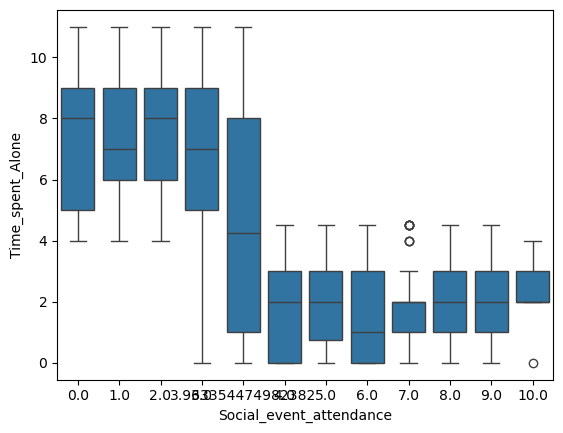

In [10]:
sns.boxplot(data = df,x= 'Social_event_attendance', y = 'Time_spent_Alone')

<Axes: xlabel='Going_outside', ylabel='Friends_circle_size'>

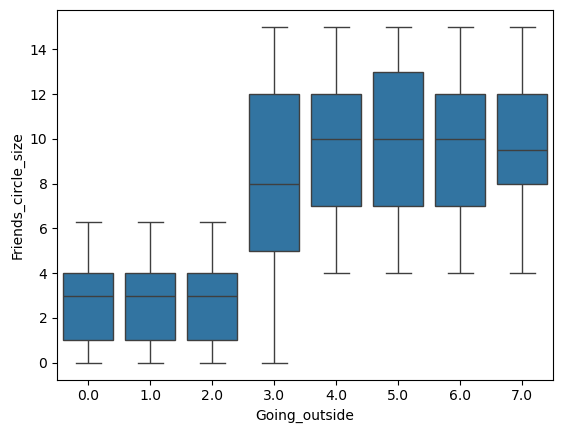

In [11]:
sns.boxplot(data = df,x= 'Going_outside', y = 'Friends_circle_size')

In [12]:
print(df['Stage_fear'].unique())
print(df['Drained_after_socializing'].unique())
print(df['Personality'].unique())


['No' 'Yes']
['No' 'Yes']
['Extrovert' 'Introvert']


In [13]:
df


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [14]:
df = pd.get_dummies(df, columns=['Stage_fear','Drained_after_socializing','Personality'], dtype=int)

In [15]:
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Personality_Extrovert,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,1,0,1,0,1,0
1,9.0,0.0,0.0,0.0,3.0,0,1,0,1,0,1
2,9.0,1.0,2.0,5.0,2.0,0,1,0,1,0,1
3,0.0,6.0,7.0,14.0,8.0,1,0,1,0,1,0
4,3.0,9.0,4.0,8.0,5.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,1,0,1,0,1,0
2896,3.0,8.0,3.0,14.0,9.0,1,0,1,0,1,0
2897,4.0,1.0,1.0,4.0,0.0,0,1,0,1,0,1
2898,11.0,1.0,3.0,2.0,0.0,0,1,0,1,0,1


In [16]:
df = df.drop(["Stage_fear_No","Drained_after_socializing_No","Personality_Extrovert"], axis = 1)

In [17]:
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,0,0,0
1,9.0,0.0,0.0,0.0,3.0,1,1,1
2,9.0,1.0,2.0,5.0,2.0,1,1,1
3,0.0,6.0,7.0,14.0,8.0,0,0,0
4,3.0,9.0,4.0,8.0,5.0,0,0,0
...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,0,0,0
2896,3.0,8.0,3.0,14.0,9.0,0,0,0
2897,4.0,1.0,1.0,4.0,0.0,1,1,1
2898,11.0,1.0,3.0,2.0,0.0,1,1,1


In [18]:
df = df.rename(columns={'Stage_fear_Yes' : 'Stage_fear', 'Drained_after_socializing_Yes' : 'Drained_after_socializing' , 'Personality_Introvert':'Personality'})

In [19]:
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,4.0,4.0,6.0,13.0,5.0,0,0,0
1,9.0,0.0,0.0,0.0,3.0,1,1,1
2,9.0,1.0,2.0,5.0,2.0,1,1,1
3,0.0,6.0,7.0,14.0,8.0,0,0,0
4,3.0,9.0,4.0,8.0,5.0,0,0,0
...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,0,0,0
2896,3.0,8.0,3.0,14.0,9.0,0,0,0
2897,4.0,1.0,1.0,4.0,0.0,1,1,1
2898,11.0,1.0,3.0,2.0,0.0,1,1,1


In [20]:
corr = df.corr()
corr

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
Time_spent_Alone,1.000000,-0.718139,-0.735247,-0.701665,-0.718072,0.834469,0.832117,0.712468
Social_event_attendance,-0.718139,1.000000,0.731941,0.718518,0.727732,-0.831737,-0.830611,-0.721520
Going_outside,-0.735247,0.731941,1.000000,0.718327,0.754758,-0.855403,-0.852969,-0.739251
Friends_circle_size,-0.701665,0.718518,0.718327,1.000000,0.690381,-0.810046,-0.805234,-0.687203
Post_frequency,-0.718072,0.727732,0.754758,0.690381,1.000000,-0.826483,-0.823028,-0.721062
Stage_fear,0.834469,-0.831737,-0.855403,-0.810046,-0.826483,1.000000,0.956518,0.847467
Drained_after_socializing,0.832117,-0.830611,-0.852969,-0.805234,-0.823028,0.956518,1.000000,0.845388
Personality,0.712468,-0.721520,-0.739251,-0.687203,-0.721062,0.847467,0.845388,1.000000


<Axes: >

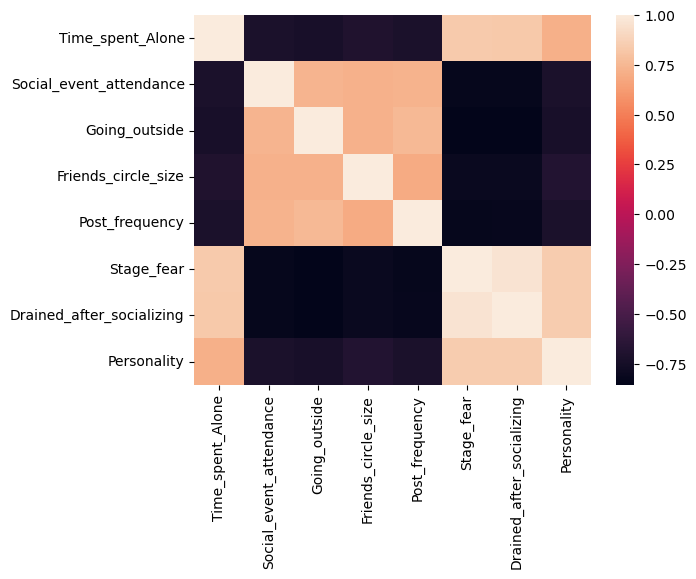

In [21]:
sns.heatmap(corr)

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Personality'])  
y = df['Personality']        

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3'])

In [23]:
X_pca.shape

(2900, 3)

In [24]:
X_pca

,PC1,PC2,PC3
0,-2.103594,0.686198,0.232120
1,2.927576,-0.733091,0.393261
2,2.164806,0.246674,0.518278
3,-3.418505,0.182126,-0.016905
4,-2.088485,0.091335,0.449562
...,...,...,...
2895,-2.125929,-0.752285,0.401029
2896,-2.808307,0.635705,0.938171
2897,2.138962,0.267501,-1.031879
2898,2.717469,-0.008184,0.718305


<Axes: >

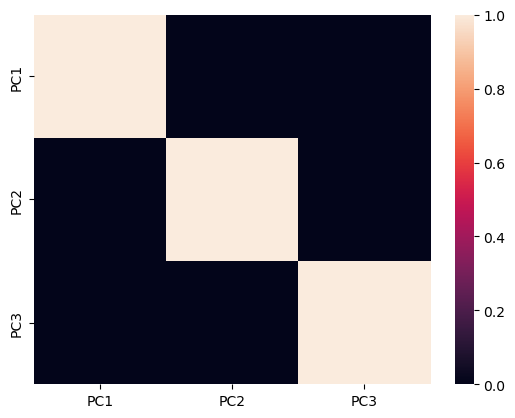

In [25]:
sns.heatmap(X_pca.corr())

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42)
X_train.shape

(2320, 3)

In [36]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
acc = model.score(X_test,y_test)
acc

0.9293103448275862

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [40]:
acc1 = clf.score(X_test,y_test)
acc1

0.9275862068965517

In [42]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9275862068965517

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [43]:
from sklearn.ensemble import RandomForestClassifier

r_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
r_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
acc_2 = r_clf.score(X_test,y_test)
acc_2

0.9206896551724137